#Import Libraries

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os

#Reading in dengue data and processing

##Read in cases data

In [200]:
data_jkt = pd.read_csv("../data/raw/jakarta_data.csv")
data_java = pd.read_csv("../data/raw/westjava_data.csv")

In [201]:
#rename time to year
data_java.rename(columns={'Time': 'Year'}, inplace=True)
data_jkt.rename(columns={'Time': 'Year'}, inplace=True)

In [202]:
#add Province column to identify the provinces of DKI Jakarta and West Java
data_java["Province"] = "West Java"
data_jkt["Province"] = "DKI Jakarta"

In [203]:
data_java.head()
data_jkt.head()

,District,Year,Age,Cases,Population,Province
0,KEPULAUAN SERIBU,2020,0-4,9,2837,DKI Jakarta
1,KEPULAUAN SERIBU,2020,10-14,1,2307,DKI Jakarta
2,KEPULAUAN SERIBU,2020,15-19,0,2575,DKI Jakarta
3,KEPULAUAN SERIBU,2020,20-44,2,11456,DKI Jakarta
4,KEPULAUAN SERIBU,2020,45-54,0,3184,DKI Jakarta


In [204]:
#check the unique values of Distric for the jkt dataset
data_jkt["District"].unique()

array(['KEPULAUAN SERIBU', 'KOTA JAKARTA BARAT', 'KOTA JAKARTA PUSAT',
       'KOTA JAKARTA SELATAN', 'KOTA JAKARTA TIMUR', 'KOTA JAKARTA UTARA'],
      dtype=object)

In [205]:
#check the unique values of Distric for the java dataset
data_java["District"].unique()

array(['BANDUNG', 'BANDUNG BARAT', 'BEKASI', 'BOGOR', 'CIAMIS', 'CIANJUR',
       'CIREBON', 'GARUT', 'INDRAMAYU', 'KARAWANG', 'KOTA BANDUNG',
       'KOTA BANJAR', 'KOTA BEKASI', 'KOTA BOGOR', 'KOTA CIMAHI',
       'KOTA CIREBON', 'KOTA DEPOK', 'KOTA SUKABUMI', 'KOTA TASIKMALAYA',
       'KUNINGAN', 'MAJALENGKA', 'PANGANDARAN', 'PURWAKARTA', 'SUBANG',
       'SUKABUMI', 'SUMEDANG', 'TASIKMALAYA'], dtype=object)

In [206]:
#check the unique values for year for jkt
data_jkt["Year"].unique()

array([2020, 2021, 2022, 2023])

In [207]:
#check the unique values for year for java
data_java["Year"].unique()

array([2020, 2021, 2022, 2023])

##total area data processing for jkt

In [208]:
#read in the total area data
area_jkt_old = pd.read_csv("../data/raw/total_area_jkt_2020.csv")
area_jkt_new = pd.read_csv("../data/raw/total_area_jkt_20212023.csv")

In [209]:
#check the files
area_jkt_old.head()

,Kab/Kota,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,The Total Area by Regency/ Municipality (Km&lt...,NaN,NaN
1,NaN,2018,2019.00,2020.00
2,Kep Seribu,8.7,10.18,10.18
3,Jakarta Selatan,141.27,154.32,154.32
4,Jakarta Timur,188.03,182.70,182.70


In [210]:
#check the files
area_jkt_new.head()

,Kab/Kota,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,The Total Area by Regency/ Municipality (Km&lt...,NaN,NaN
1,NaN,2021,2022.00,2023.00
2,Kep Seribu,10.18,10.73,10.73
3,Jakarta Selatan,154.32,144.94,144.94
4,Jakarta Timur,182.7,185.54,185.54


In [211]:
#data cleaning for old and new jkt files - values for the index 1 row to be colnames for cols 1-3, then eliminate the rows of index 0 and 1 --> area is in km^2
area_jkt_new.columns = area_jkt_new.iloc[1]
area_jkt_new = area_jkt_new.iloc[2:]
area_jkt_old.columns = area_jkt_old.iloc[1]
area_jkt_old = area_jkt_old.iloc[2:]

#rename the first column into District
area_jkt_new.rename(columns={np.nan: 'District'}, inplace=True)
area_jkt_old.rename(columns={np.nan: 'District'}, inplace=True)

In [212]:
area_jkt_old.head()

1,District,2018,2019.0,2020.0
2,Kep Seribu,8.7,10.18,10.18
3,Jakarta Selatan,141.27,154.32,154.32
4,Jakarta Timur,188.03,182.70,182.70
5,Jakarta Pusat,48.13,52.38,52.38
6,Jakarta Barat,129.54,124.44,124.44


In [213]:
area_jkt_new.head()

1,District,2021,2022.0,2023.0
2,Kep Seribu,10.18,10.73,10.73
3,Jakarta Selatan,154.32,144.94,144.94
4,Jakarta Timur,182.7,185.54,185.54
5,Jakarta Pusat,52.38,47.56,47.56
6,Jakarta Barat,124.44,125.00,125.00


In [214]:
#merge both dataframew by District, and then convert to long form, then filter to get Year = 2020-2023 only
area_jkt = pd.merge(area_jkt_old, area_jkt_new, on="District", how="inner")
area_jkt = pd.melt(area_jkt, id_vars=["District"], var_name="Year", value_name="Area_sq_km")

#convert Year to integer
area_jkt["Year"] = area_jkt["Year"].astype(int)

#filter to get 2020-2023 values
area_jkt = area_jkt[area_jkt["Year"].isin([2020, 2021, 2022, 2023])]

#convert the names of District values to upper case
area_jkt["District"] = area_jkt["District"].str.upper()

#rename the value KEP SERIBU into KEPULAUAN SERIBU and add KOTA in front of the other values under the column District
area_jkt["District"] = "KOTA " + area_jkt["District"]
area_jkt.loc[area_jkt["District"] == "KOTA KEP SERIBU", "District"] = "KEPULAUAN SERIBU"

In [215]:
#check df
area_jkt.head()

,District,Year,Area_sq_km
14,KEPULAUAN SERIBU,2020,10.18
15,KOTA JAKARTA SELATAN,2020,154.32
16,KOTA JAKARTA TIMUR,2020,182.7
17,KOTA JAKARTA PUSAT,2020,52.38
18,KOTA JAKARTA BARAT,2020,124.44


In [216]:
#check unique values for Year
area_jkt["Year"].unique()

array([2020, 2021, 2022, 2023])

##total area data processing for west java

In [217]:
area_java = pd.read_csv("../data/raw/total_area_westjava.csv")

area_java.head()

,Regency/Municipality,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,Total Area (sq. km),NaN,NaN,NaN
1,NaN,2022,2021.00,2019.00,2018.00
2,Jawa Barat Province,35377.76,35377.76,35377.76,35377.76
3,Bogor,2710.62,2710.62,2710.62,2710.62
4,Sukabumi,4145.7,4145.70,4145.70,4145.70


In [218]:
#make the values for row index 1 become column values
area_java.columns = area_java.iloc[1]
area_java = area_java.iloc[2:]

#rename the col 1 to be "District" instead of NaN
area_java.rename(columns={np.nan: 'District'}, inplace=True)

#reformat to long
area_java = pd.melt(area_java, id_vars=["District"], var_name="Year", value_name="Area_sq_km")

#eliminate the Year column here because all the area values are the same
area_java = area_java.drop(columns=["Year"])

#convert the names of District values to upper case
area_java["District"] = area_java["District"].str.upper()

#rewrite the values of District --> for values with MUNICIPALITY at the back, eliminate the MUNICIPALITY and add KOTA at the front of only the values previously containing municipality
area_java.loc[area_java["District"].str.contains("MUNICIPALITY"), "District"] = "KOTA " + area_java["District"].str.replace("MUNICIPALITY", "")


#check the dataframe format
area_java.head()

,District,Area_sq_km
0,JAWA BARAT PROVINCE,35377.76
1,BOGOR,2710.62
2,SUKABUMI,4145.7
3,CIANJUR,3840.16
4,BANDUNG,1767.96


In [219]:
area_java["District"].unique()

array(['JAWA BARAT PROVINCE', 'BOGOR', 'SUKABUMI', 'CIANJUR', 'BANDUNG',
       'GARUT', 'TASIKMALAYA', 'CIAMIS', 'KUNINGAN', 'CIREBON',
       'MAJALENGKA', 'SUMEDANG', 'INDRAMAYU', 'SUBANG', 'PURWAKARTA',
       'KARAWANG', 'BEKASI', 'BANDUNG BARAT', 'PANGANDARAN',
       'KOTA BOGOR ', 'KOTA SUKABUMI ', 'KOTA BANDUNG ', 'KOTA CIREBON ',
       'KOTA BEKASI ', 'KOTA DEPOK ', 'KOTA CIMAHI ', 'KOTA TASIKMALAYA ',
       'KOTA BANJAR '], dtype=object)

In [220]:
#merge the jkt and java datasets to the df_long dataset by District and Year to add the population density column
data_java = data_java.merge(area_java, on=["District"], how="left")
data_jkt = data_jkt.merge(area_jkt, on=["District", "Year"], how="left")

In [221]:
#convert population and area to integer
data_java["Population"] = data_java["Population"].astype(int)
data_jkt["Population"] = data_jkt["Population"].astype(int)

#convert the area_sq_km values into
data_java["Area_sq_km"] = data_java["Area_sq_km"].astype(float)
data_jkt["Area_sq_km"] = data_jkt["Area_sq_km"].astype(float)
data_java["Pop_density"] = data_java["Population"] / data_java["Area_sq_km"]
data_jkt["Pop_density"] = data_jkt["Population"] / data_jkt["Area_sq_km"]

In [222]:
data_jkt.head()

,District,Year,Age,Cases,Population,Province,Area_sq_km,Pop_density
0,KEPULAUAN SERIBU,2020,0-4,9,2837,DKI Jakarta,10.18,278.683694
1,KEPULAUAN SERIBU,2020,10-14,1,2307,DKI Jakarta,10.18,226.620825
2,KEPULAUAN SERIBU,2020,15-19,0,2575,DKI Jakarta,10.18,252.946955
3,KEPULAUAN SERIBU,2020,20-44,2,11456,DKI Jakarta,10.18,1125.343811
4,KEPULAUAN SERIBU,2020,45-54,0,3184,DKI Jakarta,10.18,312.770138


In [223]:
#check unique values for year
data_java["Year"].unique()

array([2020, 2021, 2022, 2023])

In [224]:
#check unique values for year
data_jkt["Year"].unique()

array([2020, 2021, 2022, 2023])

In [225]:
#read in HDI data
data_hdi_old = pd.read_csv("../data/raw/hdi_2019-2021.csv")
data_hdi_new = pd.read_csv("../data/raw/hdi_2022-2024.csv")

In [226]:
data_hdi_old.head()

,Province/Regency/City,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,[New Method] Human Development Index,NaN,NaN
1,NaN,2019,2020,2021
2,ACEH,71.9,71.99,72.18
3,Simeulue,65.7,66.03,66.41
4,Aceh Singkil,68.91,68.94,69.22


In [227]:
data_hdi_new.head()

,Province/Regency/City,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,[New Method] Human Development Index,NaN,NaN
1,NaN,2022,2023,2024
2,ACEH,72.8,73.4,74.03
3,Simeulue,67.27,68.06,69.01
4,Aceh Singkil,69.62,70.14,70.75


In [228]:
#the colnames of the index 1 row to be colnames
data_hdi_new.columns = data_hdi_new.iloc[1]
data_hdi_new = data_hdi_new.iloc[2:]
data_hdi_old.columns = data_hdi_old.iloc[1]
data_hdi_old = data_hdi_old.iloc[2:]
#rename the first column to "District"
data_hdi_new.rename(columns={np.nan: 'District'}, inplace=True)
data_hdi_old.rename(columns={np.nan: 'District'}, inplace=True)

In [229]:
data_hdi_old.head()

1,District,2019,2020,2021
2,ACEH,71.9,71.99,72.18
3,Simeulue,65.7,66.03,66.41
4,Aceh Singkil,68.91,68.94,69.22
5,Aceh Selatan,66.9,67.12,67.44
6,Aceh Tenggara,69.36,69.37,69.44


In [230]:
data_hdi_new.head()

1,District,2022,2023,2024
2,ACEH,72.8,73.4,74.03
3,Simeulue,67.27,68.06,69.01
4,Aceh Singkil,69.62,70.14,70.75
5,Aceh Selatan,67.87,68.44,69.1
6,Aceh Tenggara,70.32,71.05,71.7


In [231]:
#concat by district
data_hdi = pd.merge(data_hdi_new, data_hdi_old, on=["District"], how="inner")

In [232]:
#check head for combined data_hdi
data_hdi.head()

1,District,2022,2023,2024,2019,2020,2021
0,ACEH,72.8,73.4,74.03,71.9,71.99,72.18
1,Simeulue,67.27,68.06,69.01,65.7,66.03,66.41
2,Aceh Singkil,69.62,70.14,70.75,68.91,68.94,69.22
3,Aceh Selatan,67.87,68.44,69.1,66.9,67.12,67.44
4,Aceh Tenggara,70.32,71.05,71.7,69.36,69.37,69.44


In [233]:
#pivot to long from wide
data_hdi = pd.melt(data_hdi, id_vars=["District"], var_name="Year", value_name="HDI")

#check
data_hdi.head()

,District,Year,HDI
0,ACEH,2022,72.8
1,Simeulue,2022,67.27
2,Aceh Singkil,2022,69.62
3,Aceh Selatan,2022,67.87
4,Aceh Tenggara,2022,70.32


In [234]:
#check unique values for Year
data_hdi["Year"].unique()

array(['2022', '2023', '2024', '2019', '2020', '2021'], dtype=object)

In [235]:
#rename Kep.Seribu into kepulauan seribu
data_hdi.loc[data_hdi["District"] == "Kep. Seribu", "District"] = "Kepulauan Seribu"

#convert the values of District column into all upper case
data_hdi["District"] = data_hdi["District"].str.upper()

#check again

data_hdi.head()

,District,Year,HDI
0,ACEH,2022,72.8
1,SIMEULUE,2022,67.27
2,ACEH SINGKIL,2022,69.62
3,ACEH SELATAN,2022,67.87
4,ACEH TENGGARA,2022,70.32


In [236]:
#convert Year to integer
data_hdi["Year"] = data_hdi["Year"].astype(int)

In [237]:
#merge the hdi data with the data_java and data_jakarta
data_java = data_java.merge(data_hdi, on=["District", "Year"], how="left")
data_jkt = data_jkt.merge(data_hdi, on=["District", "Year"], how="left")

In [238]:
#check
data_java.head()

,District,Year,Age,Cases,Population,Province,Area_sq_km,Pop_density,HDI
0,BANDUNG,2020,0-4,332,313554,West Java,1767.96,177.35356,72.39
1,BANDUNG,2020,0-4,332,313554,West Java,1767.96,177.35356,72.39
2,BANDUNG,2020,0-4,332,313554,West Java,1767.96,177.35356,72.39
3,BANDUNG,2020,0-4,332,313554,West Java,1767.96,177.35356,72.39
4,BANDUNG,2020,15-44,950,1772345,West Java,1767.96,1002.48026,72.39


In [239]:
#check values of Year
data_java["Year"].unique()

array([2020, 2021, 2022, 2023])

In [240]:
#check
data_jkt.head()

,District,Year,Age,Cases,Population,Province,Area_sq_km,Pop_density,HDI
0,KEPULAUAN SERIBU,2020,0-4,9,2837,DKI Jakarta,10.18,278.683694,71.63
1,KEPULAUAN SERIBU,2020,10-14,1,2307,DKI Jakarta,10.18,226.620825,71.63
2,KEPULAUAN SERIBU,2020,15-19,0,2575,DKI Jakarta,10.18,252.946955,71.63
3,KEPULAUAN SERIBU,2020,20-44,2,11456,DKI Jakarta,10.18,1125.343811,71.63
4,KEPULAUAN SERIBU,2020,45-54,0,3184,DKI Jakarta,10.18,312.770138,71.63


In [241]:
#check values for year
data_jkt["Year"].unique()

array([2020, 2021, 2022, 2023])

#Read in shp file (district-level) for Indonesia

In [242]:
df_shp_dist = gpd.read_file("../data/raw/adm2.shp")

In [243]:
print(df_shp_dist.head())  # Displays the first 5 rows

           ADM2_EN          x         y  \
0       Aceh Barat  96.185453  4.456643   
1  Aceh Barat Daya  96.878320  3.824899   
2       Aceh Besar  95.515608  5.379938   
3        Aceh Jaya  95.678706  4.832184   
4     Aceh Selatan  97.435351  3.162864   

                                            geometry  
0  POLYGON ((96.26836 4.768, 96.26822 4.7625, 96....  
1  MULTIPOLYGON (((96.80559 3.71758, 96.80444 3.7...  
2  MULTIPOLYGON (((95.20544 5.28072, 95.20563 5.2...  
3  MULTIPOLYGON (((95.58431 4.61495, 95.58379 4.6...  
4  MULTIPOLYGON (((97.59461 2.80777, 97.59365 2.8...  


In [244]:
print(df_shp_dist["ADM2_EN"].unique())  # Replace "shape1" with the suspected column name

['Aceh Barat' 'Aceh Barat Daya' 'Aceh Besar' 'Aceh Jaya' 'Aceh Selatan'
 'Aceh Singkil' 'Aceh Tamiang' 'Aceh Tengah' 'Aceh Tenggara' 'Aceh Timur'
 'Aceh Utara' 'Agam' 'Alor' 'Asahan' 'Asmat' 'Badung' 'Balangan' 'Bandung'
 'Bandung Barat' 'Banggai' 'Banggai Kepulauan' 'Banggai Laut' 'Bangka'
 'Bangka Barat' 'Bangka Selatan' 'Bangka Tengah' 'Bangkalan' 'Bangli'
 'Banjar' 'Banjarnegara' 'Bantaeng' 'Bantul' 'Banyu Asin' 'Banyumas'
 'Banyuwangi' 'Barito Kuala' 'Barito Selatan' 'Barito Timur'
 'Barito Utara' 'Barru' 'Batang' 'Batang Hari' 'Batu Bara' 'Bekasi'
 'Belitung' 'Belitung Timur' 'Belu' 'Bener Meriah' 'Bengkalis'
 'Bengkayang' 'Bengkulu Selatan' 'Bengkulu Tengah' 'Bengkulu Utara'
 'Berau' 'Biak Numfor' 'Bima' 'Bintan' 'Bireuen' 'Blitar' 'Blora'
 'Boalemo' 'Bogor' 'Bojonegoro' 'Bolaang Mongondow'
 'Bolaang Mongondow Selatan' 'Bolaang Mongondow Timur'
 'Bolaang Mongondow Utara' 'Bombana' 'Bondowoso' 'Bone' 'Bone Bolango'
 'Boven Digoel' 'Boyolali' 'Brebes' 'Buleleng' 'Bulukumba' 'Bulun

In [245]:
#rename shape1 to District
df_shp_dist.rename(columns={'ADM2_EN': 'District'}, inplace=True)

#convert the values of the column District to all caps
df_shp_dist["District"] = df_shp_dist["District"].str.upper()

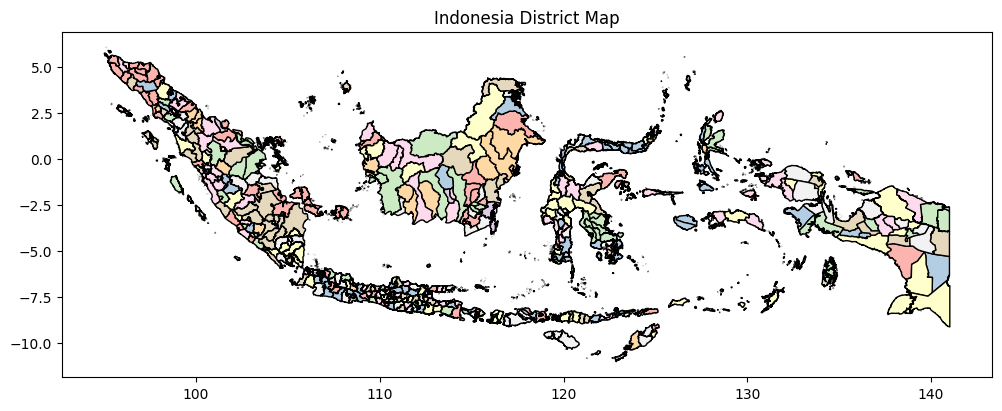

In [246]:
fig, ax = plt.subplots(figsize=(12, 8))
df_shp_dist.plot(ax=ax, edgecolor="black", cmap="Pastel1")

plt.title("Indonesia District Map")
plt.show()

#Tidy up the dengue data first into one final df

In [247]:
#combine the dengue data for both jkt and java
df_combined = pd.concat([data_java, data_jkt], ignore_index=True)

In [248]:
#delete rows with redundant/repeated age groups --> we can take the interval of 9 years gap to avoid having too many groupings for age

#inconsistent age group intervals --> not a good way to stratify the data based on age group! can just combine the entire dataset to be of one age group for now
#for this --> eliminate redundant rows with age groups that are repeated --> 5-9, 10-14, 15-19, 20-44
df_combined = df_combined[~df_combined['Age'].isin(['5-9', '10-14', '15-19', '20-44', '45-54', '55-64', '65-74', '75-99'])]

In [249]:
#check the unique age grps again
df_combined['Age'].unique()

array(['0-4', '15-44', '45-99', '5-14'], dtype=object)

In [250]:
#now we merge the age groups together for each of the same District, Year, Area_sq_km, HDI --> need to sum Cases and Population metrics and the recalculate Pop_density
df_combined = df_combined.groupby(['District', 'Year', 'Area_sq_km', 'HDI', "Province"]).agg({'Cases': 'sum', 'Population': 'sum'}).reset_index()

In [251]:
df_combined.head()

,District,Year,Area_sq_km,HDI,Province,Cases,Population
0,BANDUNG,2020,1767.96,72.39,West Java,9180,14495160
1,BANDUNG,2021,1767.96,72.73,West Java,8008,14662620
2,BANDUNG,2022,1767.96,73.16,West Java,16764,14830092
3,BANDUNG,2023,1767.96,73.74,West Java,4020,14997564
4,BANDUNG BARAT,2020,1305.77,68.08,West Java,3864,7153344


In [252]:
#recalculate the Pop_density
df_combined['Pop_den'] = df_combined['Population'] / df_combined['Area_sq_km']

In [253]:
#make sure that Year is integer, Area_sq_km is float, HDI is float, Cases, Population, Pop_density are numbers, and HDI is float
#check type of data first
df_combined.dtypes

District       object
Year            int64
Area_sq_km    float64
HDI            object
Province       object
Cases           int64
Population      int64
Pop_den       float64
dtype: object

In [254]:
#convert HDI into float
df_combined['HDI'] = df_combined['HDI'].astype(float)

In [255]:
#check the data types again
df_combined.dtypes

District       object
Year            int64
Area_sq_km    float64
HDI           float64
Province       object
Cases           int64
Population      int64
Pop_den       float64
dtype: object

#Combine shp and dengue data

In [256]:
#combine shp file with dengue data
##aim: get a single shp file that contains ONLY the coordinates for Jawa and the districts within Jawa
data_combined = df_shp_dist.merge(df_combined, left_on="District", right_on="District")

#check
data_combined.head()

,District,x,y,geometry,Year,Area_sq_km,HDI,Province,Cases,Population,Pop_den
0,BANDUNG,107.610841,-7.099969,"POLYGON ((107.73309 -6.814, 107.73354 -6.81427...",2020,1767.96,72.39,West Java,9180,14495160,8198.805403
1,BANDUNG,107.610841,-7.099969,"POLYGON ((107.73309 -6.814, 107.73354 -6.81427...",2021,1767.96,72.73,West Java,8008,14662620,8293.524740
2,BANDUNG,107.610841,-7.099969,"POLYGON ((107.73309 -6.814, 107.73354 -6.81427...",2022,1767.96,73.16,West Java,16764,14830092,8388.250865
3,BANDUNG,107.610841,-7.099969,"POLYGON ((107.73309 -6.814, 107.73354 -6.81427...",2023,1767.96,73.74,West Java,4020,14997564,8482.976990
4,BANDUNG BARAT,107.414953,-6.897056,"POLYGON ((107.40945 -6.68851, 107.40986 -6.688...",2020,1305.77,68.08,West Java,3864,7153344,5478.257273


In [257]:
#group by province, calculate total cases and population
data_combined["Tot_Cases"] = data_combined.groupby("Province")["Cases"].transform("sum")
data_combined["Tot_Pop"] = data_combined.groupby("Province")["Population"].transform("sum")

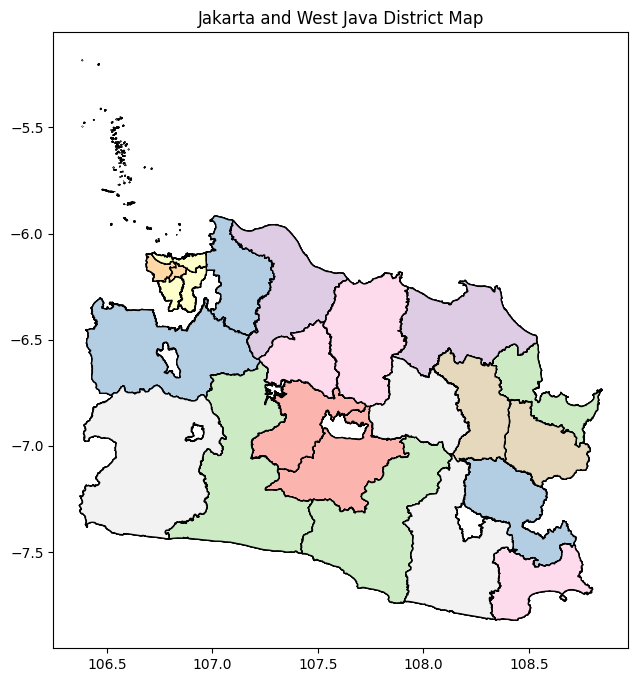

In [258]:
# Ensure data_combined is a GeoDataFrame
data_combined = gpd.GeoDataFrame(data_combined, geometry='geometry')

#plot it out to check again that the area is complete for west java n jakarta
fig, ax = plt.subplots(figsize=(12, 8))
data_combined.plot(ax=ax, edgecolor="black", cmap="Pastel1")

plt.title("Jakarta and West Java District Map")
plt.show()

In [260]:
#save the final df used for this task to shp file
data_combined.to_file("../data/processed/final_combined_divisions/final_combined_divisions.shp")  # Specify the driver